In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


# California houses prices prediction

individual project for Preprocessing & modeling SIC course.

The objective of this Notebook is to predict California houses prices using linear models.

The model will be trained based on the data set created by https://www.kaggle.com/datasets/camnugent/california-housing-prices

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
housing = pd.read_csv("../input/california-housing-prices/housing.csv" , sep = "," , encoding = 'utf-8')
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


About this data
1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

In [4]:
data =housing.copy()

In [5]:
# Changing medianHouseValue measure from US Dollars to 10K of US Dollars
data['median_house_value']=housing['median_house_value'].div(10000)

In [6]:
data.median_house_value.describe()

count    20640.000000
mean        20.685582
std         11.539562
min          1.499900
25%         11.960000
50%         17.970000
75%         26.472500
max         50.000100
Name: median_house_value, dtype: float64

In [7]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Handling null values

<AxesSubplot:>

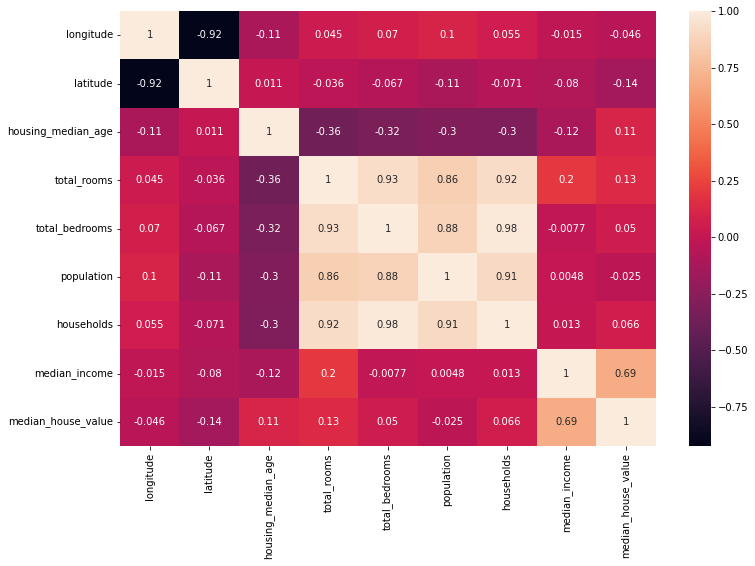

In [8]:
plt.figure(figsize=(12,8))
sns.heatmap(data.corr() , annot = True)

In [9]:
# There  is relation between total bedrooms and total rooms 
# use this relation to fill null values in total bedrooms column
x=data.total_rooms.median()/data.total_bedrooms.median()
data['total_bedrooms'].fillna(round(data['total_rooms'].div(x)),inplace=True)

In [10]:
print(data.total_bedrooms.describe())
print(housing.total_bedrooms.describe())

count    20640.000000
mean       537.732510
std        420.856272
min          1.000000
25%        295.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64
count    20433.000000
mean       537.870553
std        421.385070
min          1.000000
25%        296.000000
50%        435.000000
75%        647.000000
max       6445.000000
Name: total_bedrooms, dtype: float64


<AxesSubplot:xlabel='total_bedrooms', ylabel='total_rooms'>

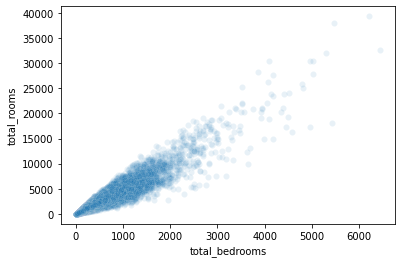

In [11]:
sns.scatterplot(data=data, x="total_bedrooms", y="total_rooms", alpha=.1 )

<AxesSubplot:xlabel='total_bedrooms', ylabel='total_rooms'>

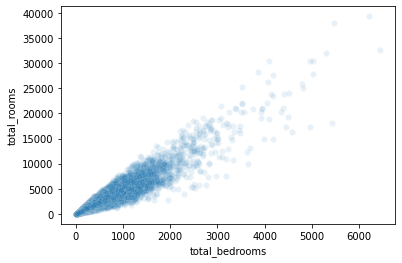

In [12]:
sns.scatterplot(data=housing, x="total_bedrooms", y="total_rooms", alpha=.1)

In [13]:
ocean_proximity_le = LabelEncoder()

In [14]:
data['ocean_proximity'] = ocean_proximity_le.fit_transform(data['ocean_proximity'])

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 1.6 MB


## handling outliars

<AxesSubplot:>

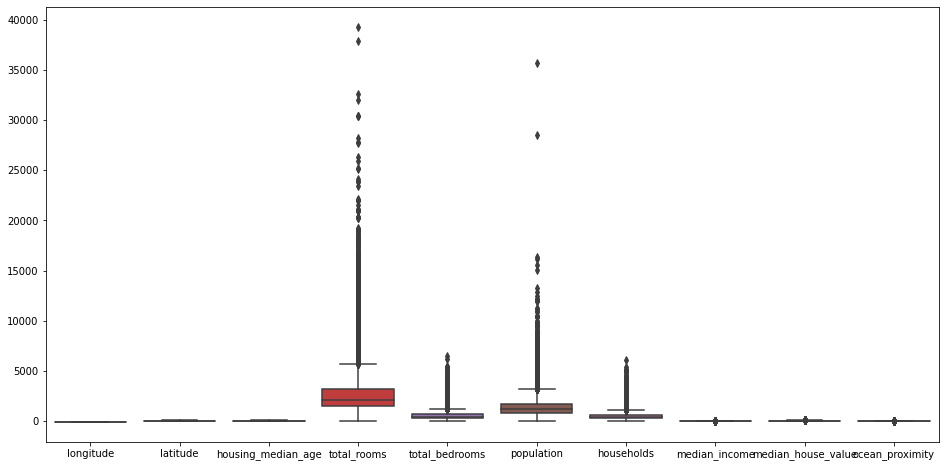

In [16]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>

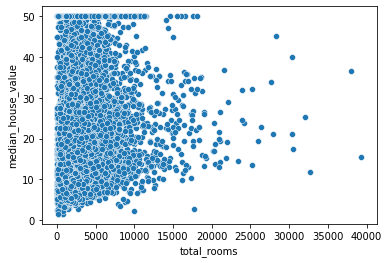

In [17]:
sns.scatterplot(data['total_rooms'], data['median_house_value'])

<AxesSubplot:xlabel='total_rooms'>

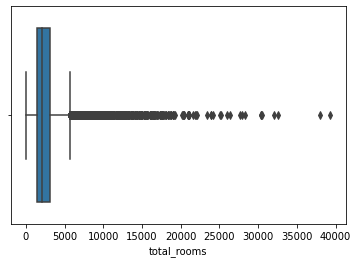

In [18]:
sns.boxplot(x=data['total_rooms'])

<AxesSubplot:xlabel='total_rooms'>

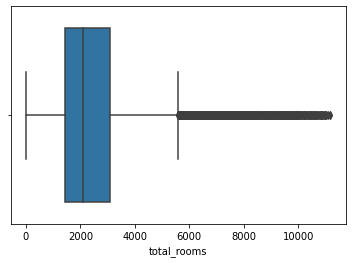

In [19]:
u = data.total_rooms.quantile(0.99)
data = data.loc[(data["total_rooms"]<u)]
sns.boxplot(x=data['total_rooms'])

<AxesSubplot:xlabel='population'>

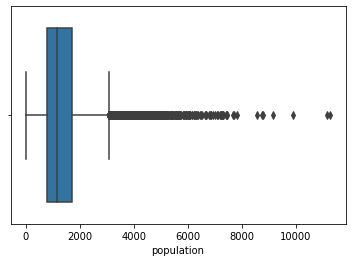

In [20]:
sns.boxplot(x=data.population)

<AxesSubplot:xlabel='population'>

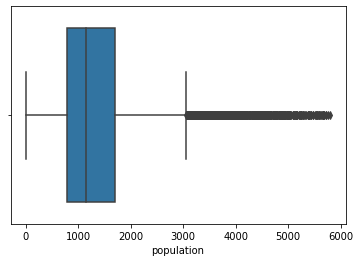

In [21]:
u = data.total_rooms.quantile(0.95)
data = data.loc[(data["population"]<u)]
sns.boxplot(x=data['population'])

<AxesSubplot:>

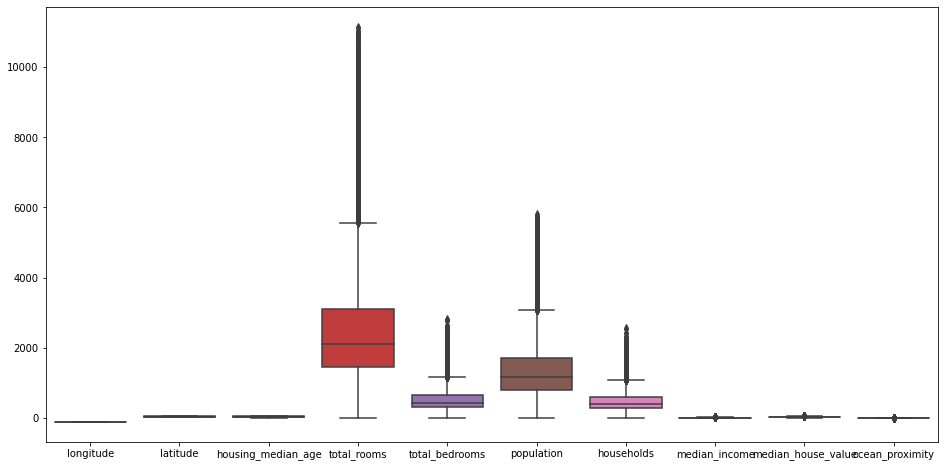

In [22]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data)

In [23]:
data.shape

(20372, 10)

## splitting the data

In [24]:
x = data.drop(["median_house_value","longitude","latitude"], axis = 1).values
y = data["median_house_value"].values
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state= 42)

In [25]:
print(x_train.shape)
print(x_test.shape)

(16297, 7)
(4075, 7)


## Scaling

In [26]:
ro_scaler = RobustScaler()
x_train = ro_scaler.fit_transform(x_train)
x_test = ro_scaler.fit_transform(x_test)

## Modeling

### linear

In [27]:
reg = linear_model.LinearRegression()
reg.fit(x_train , y_train)

LinearRegression()

In [28]:
print(reg.score(x_train , y_train))
print(reg.score(x_test , y_test))

0.5742662011422421
0.5986155790738412


In [29]:
print(reg.intercept_)
print(reg.coef_)

18.807626464677487
[ 3.35010995 -4.14004833  3.84093689 -4.23372894  5.31375313 10.55592973
  0.36153498]


In [30]:
pd.DataFrame(reg.coef_, data.columns[2:-1], columns = ["coefficient"])

,coefficient
housing_median_age,3.350110
total_rooms,-4.140048
total_bedrooms,3.840937
population,-4.233729
households,5.313753
median_income,10.555930
median_house_value,0.361535


In [31]:
yreg_pred = reg.predict(x_test)
df1 = pd.DataFrame({"Y_test": y_test , "Y_pred" : yreg_pred})
df1.head()

,Y_test,Y_pred
0,11.11,20.975864
1,30.87,26.021045
2,8.84,8.501820
3,11.73,15.336659
4,33.69,24.990343


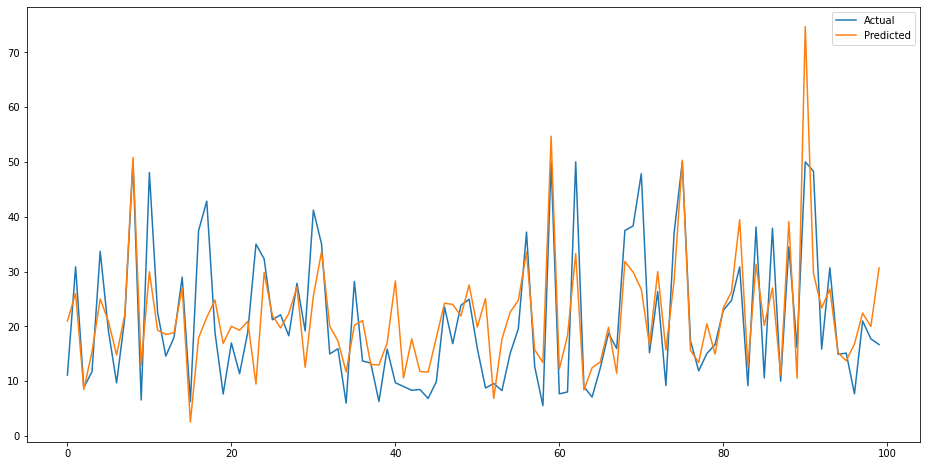

In [32]:
plt.figure(figsize=(16,8))
plt.plot(df1[:100])
plt.legend(['Actual' , 'Predicted'])

### Ridge

In [33]:
rid = linear_model.Ridge(alpha=.4)
rid.fit(x_train , y_train)

Ridge(alpha=0.4)

In [34]:
print(rid.score(x_train , y_train))
print(rid.score(x_test , y_test))

0.574266194352871
0.5986161680503639


In [35]:
print(rid.intercept_)
print(rid.coef_)

18.80774235849994
[ 3.35005813 -4.13786741  3.83992452 -4.23286491  5.31182183 10.55500133
  0.36156678]


In [36]:
pd.DataFrame(rid.coef_, data.columns[2:-1], columns = ["coefficient"])

,coefficient
housing_median_age,3.350058
total_rooms,-4.137867
total_bedrooms,3.839925
population,-4.232865
households,5.311822
median_income,10.555001
median_house_value,0.361567


In [37]:
yrid_pred = rid.predict(x_test)
df2 = pd.DataFrame({"Y_test": y_test , "Y_pred" : yrid_pred})
df2.head()

,Y_test,Y_pred
0,11.11,20.976455
1,30.87,26.020487
2,8.84,8.502730
3,11.73,15.336981
4,33.69,24.990693


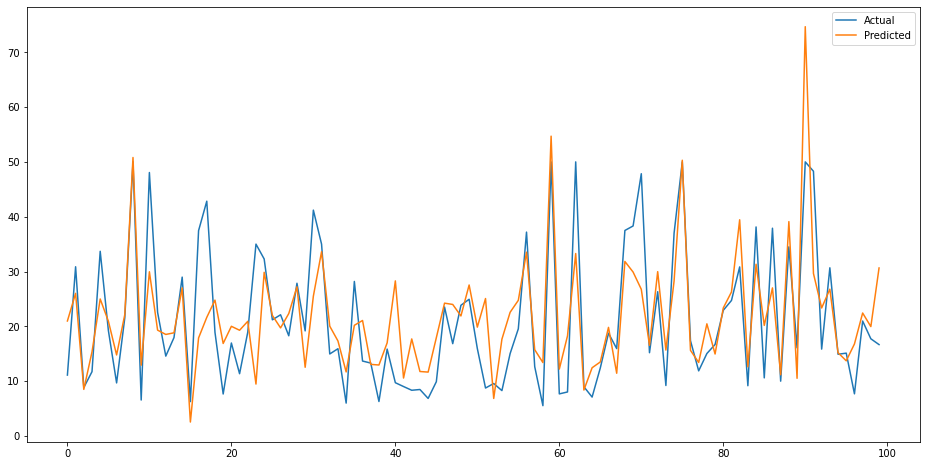

In [38]:
plt.figure(figsize=(16,8))
plt.plot(df2[:100])
plt.legend(['Actual' , 'Predicted'])

### Lasso

In [39]:
las = linear_model.Lasso(alpha=.4)
las.fit(x_train , y_train)

Lasso(alpha=0.4)

In [40]:
print(las.score(x_train , y_train))
print(las.score(x_test , y_test))

0.5318487101458684
0.5538520758174073


In [41]:
print(las.intercept_)
print(las.coef_)

19.074091615501953
[ 2.61812666 -0.          0.6270564  -0.92435328  1.18072935  8.84363736
  0.34425936]


In [42]:
pd.DataFrame(las.coef_, data.columns[2:-1], columns = ["coefficient"])

,coefficient
housing_median_age,2.618127
total_rooms,-0.000000
total_bedrooms,0.627056
population,-0.924353
households,1.180729
median_income,8.843637
median_house_value,0.344259


In [43]:
ylas_pred = las.predict(x_test)
df3 = pd.DataFrame({"Y_test": y_test , "Y_pred" : ylas_pred})
df3.head()

,Y_test,Y_pred
0,11.11,22.466753
1,30.87,25.661168
2,8.84,10.555079
3,11.73,17.111594
4,33.69,25.631412


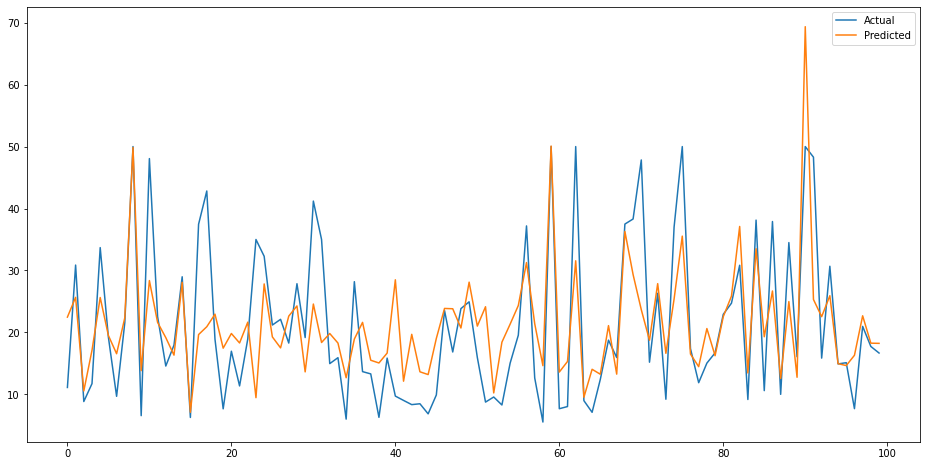

In [44]:
plt.figure(figsize=(16,8))
plt.plot(df3[:100])
plt.legend(['Actual' , 'Predicted'])

### Comparison

In [45]:
reg_pred = reg.predict(x_test)
rid_pred = rid.predict(x_test)
las_pred = las.predict(x_test)
df = pd.DataFrame({"Y_test": y_test , "reg_pred" : reg_pred , "rid_pred" : rid_pred , "las_pred" : las_pred})
df.head(10)

,Y_test,reg_pred,rid_pred,las_pred
0,11.1100,20.975864,20.976455,22.466753
1,30.8700,26.021045,26.020487,25.661168
2,8.8400,8.501820,8.502730,10.555079
3,11.7300,15.336659,15.336981,17.111594
4,33.6900,24.990343,24.990693,25.631412
5,19.2200,20.924822,20.924432,19.500733
6,9.6800,14.784195,14.785019,16.556372
7,21.5600,22.149000,22.149157,22.361070
8,50.0001,50.798238,50.797380,49.863806
9,6.5600,12.911874,12.912663,13.825264


## Evaluation

### regression

In [46]:
print(r2_score(y_test, yreg_pred))
print(1-(1-r2_score(y_test, yreg_pred))*(len(y_train)-1)/(len(y_train)-len(x_train[0])-1))
print(mean_squared_error(y_test,yreg_pred))
print(mean_absolute_percentage_error(y_test, yreg_pred))


0.5986155790738412
0.598443088991793
54.44393009358748
0.34629564752845077


### Ridge

In [47]:
print(r2_score(y_test, yrid_pred))
print(1-(1-r2_score(y_test, yrid_pred))*(len(y_train)-1)/(len(y_train)-len(x_train[0])-1))
print(mean_squared_error(y_test,yrid_pred))
print(mean_absolute_percentage_error(y_test, yrid_pred))


0.5986161680503639
0.5984436782214212
54.44385020459589
0.346304121614282


### Lasso

In [48]:
print(r2_score(y_test, ylas_pred))
print(1-(1-r2_score(y_test, ylas_pred))*(len(y_train)-1)/(len(y_train)-len(x_train[0])-1))
print(mean_squared_error(y_test,ylas_pred))
print(mean_absolute_percentage_error(y_test, ylas_pred))


0.5538520758174073
0.5536603491632678
60.515668095809815
0.3772778387561191
